In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
dataset=pd.read_csv('C:/Users/RANSHUL/OneDrive/Desktop/Stock market prediction/TCS.NS.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-16,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
1,2004-01-19,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
2,2004-01-20,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
3,2004-01-21,38.387501,38.387501,38.387501,38.387501,27.19158,0.0
4,2004-01-22,38.387501,38.387501,38.387501,38.387501,27.19158,0.0


In [6]:
dataset.shape

(5017, 7)

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 5016
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5009 non-null   object 
 1   Open       5009 non-null   float64
 2   High       5009 non-null   float64
 3   Low        5009 non-null   float64
 4   Close      5009 non-null   float64
 5   Adj Close  5009 non-null   float64
 6   Volume     5009 non-null   float64
dtypes: float64(6), object(1)
memory usage: 313.1+ KB


In [9]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5.009000e+03
mean,1281.513748,1294.711284,1267.477902,1281.004200,1157.789240,3.397382e+06
std,1143.454773,1153.256001,1133.127827,1143.190339,1123.557564,3.139623e+06
min,38.387501,38.387501,38.387501,38.387501,27.191580,0.000000e+00
25%,285.987488,289.000000,279.687500,284.237488,208.278183,1.793722e+06
50%,1072.500000,1084.800049,1060.349976,1072.199951,873.811890,2.635047e+06
75%,2005.000000,2024.000000,1984.000000,2005.650024,1803.442139,4.100988e+06
max,4215.250000,4254.750000,4177.000000,4219.250000,4219.250000,8.806715e+07


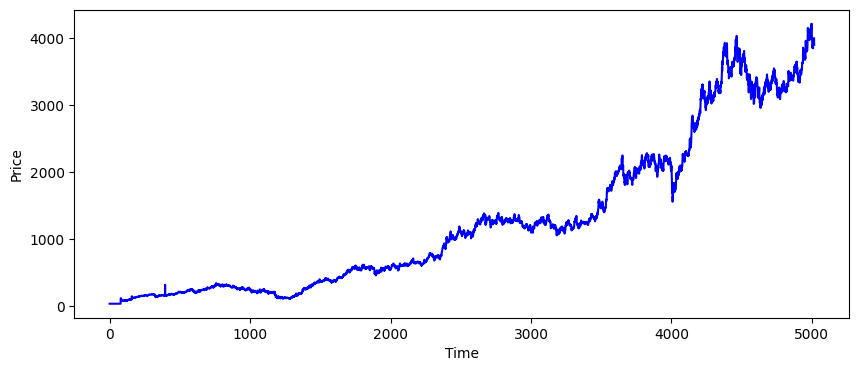

In [10]:
plt.figure(figsize=(10,4))
plt.plot(dataset.Open,'b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [264]:
x=dataset[['Adj Close']]
y=dataset['Close']

In [265]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)

In [266]:
x_train.shape

(3756, 1)

In [267]:
x_test.shape

(1253, 1)

In [268]:
from sklearn.linear_model import LinearRegression


reg=LinearRegression()

In [269]:
reg.fit(x_train,y_train)

LinearRegression()

In [270]:
#coffecient
print(reg.coef_)

[1.01694629]


In [271]:
# intercept
print(reg.intercept_)

103.65327259611331


In [272]:
predicted=reg.predict(x_test)
predicted

array([ 220.22331688, 3174.31762604,  258.21653905, ..., 2799.62505744,
       1778.15253794, 1133.15553389])

In [273]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [274]:
predicted.shape

(1253,)

In [275]:
reg.score(x_test,y_test)

0.9971449177891388

In [276]:
import math

In [277]:
_df=pd.DataFrame({"actual":y_test,"predicted":predicted})
print(_df)

           actual    predicted
406    160.357498   220.223317
4233  3206.000000  3174.317626
492    211.687500   258.216539
4148  2830.000000  2797.555661
1531   395.799988   410.879860
...           ...          ...
554    236.669998   276.777407
2849  1301.949951  1221.027477
4197  2820.149902  2799.625057
3589  1851.349976  1778.152538
3141  1176.224976  1133.155534

[1253 rows x 2 columns]


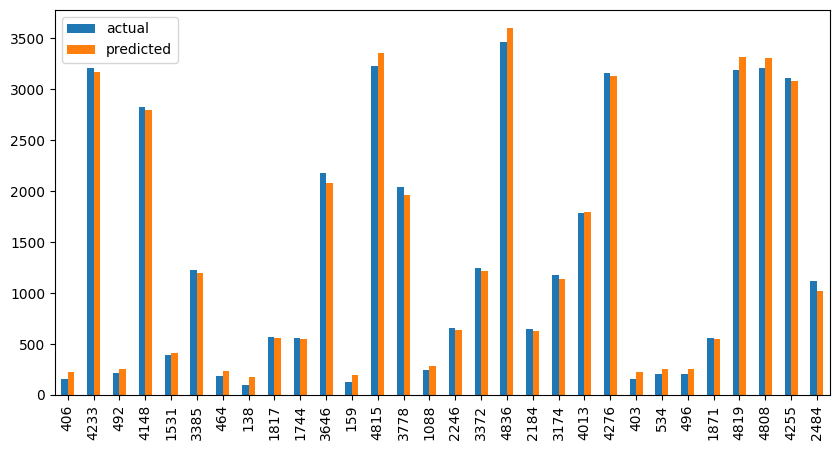

In [283]:
fig, ax = plt.subplots(figsize=(10, 5))
graph=_df.head(30)
graph.plot(kind='bar',ax=ax)
plt.show()

In [279]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Error',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error:  51.05469112175456
Mean Squared Error 3823.853761126392
Root Mean Error 61.83731689786024
